In [148]:
import joblib
import numpy as np, cv2
from matplotlib import pyplot as plt

## Load the Model
model = joblib.load('BrainTumor.sav')
tumor_label = 2

# Let's Explore for a Single Brain Tumor Image

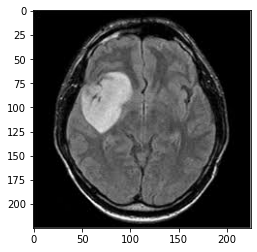

In [149]:
## Load Image in RGB mode
imgRGB = cv2.imread(r'C:\Users\KIIT\Tensorflow\Brain_Tumor\Brain_Tumor_Detection\brain_tumor_dataset\yes\y4.jpg')
plt.imshow(imgRGB)

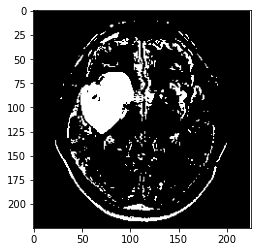

In [150]:
## Load Image in GRAY-scale mode
img = cv2.imread(r'C:\Users\KIIT\Tensorflow\Brain_Tumor\Brain_Tumor_Detection\brain_tumor_dataset\yes\y4.jpg', 0)
height, width = img.shape

## Flatten 2D image => 1-D image
img_flatten = img.reshape(height*width, 1)

## Predict {which pixel of image belongs to which Cluster}
label = model.predict(img_flatten)
## convert 1D label -> 2D label
label2D = label.reshape(height, width)

## Distribute predicted label into [2 classes]
## 1-> class [which is expected to cointain tumor with max probability ie cluster no 2..refer to K-Means Clustering Notebook]
## 2-> class [which does not cointains tumor]
mask_img = (label2D==tumor_label)
plt.imshow(mask_img, cmap='gray')

In [151]:
tumor_extracted = np.bitwise_and(mask, img)
print('shape of tumor_extracted', tumor_extracted.shape)
tumor_extracted

shape of tumor_extracted (225, 225)


array([[0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Draw Contours

Length of Contours 621


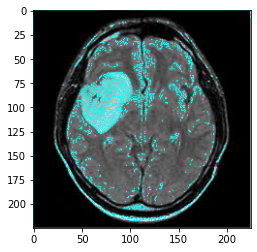

In [152]:
## https://stackoverflow.com/questions/25504964/opencv-python-valueerror-too-many-values-to-unpack
img_original = cv2.imread(r'C:\Users\KIIT\Tensorflow\Brain_Tumor\Brain_Tumor_Detection\brain_tumor_dataset\yes\y4.jpg')

## Draw Contours on pixels which belong to Cluster 2
(image, contours, hierarchy) = cv2.findContours(tumor_extracted, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print('Length of Contours', len(contours))
cv2.drawContours(img_original, contours, -1, (0,255,255), 1)

plt.imshow(img_original)

# Detect Brain Tumor part

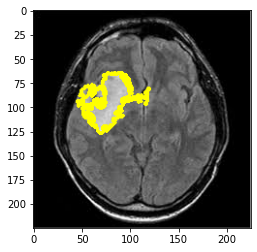

In [153]:
img_ = cv2.imread(r'C:\Users\KIIT\Tensorflow\Brain_Tumor\Brain_Tumor_Detection\brain_tumor_dataset\yes\y4.jpg')
(image, contours, hierarchy) = cv2.findContours(tumor_extracted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## iterate over all contours
## Threshold Contour area = 1100
thres = 1100

for In, contour in enumerate(contours):
    contour_area = cv2.contourArea(contour)
    if(contour_area > thres):
        cv2.drawContours(img_, contours, In, (255,255,0), 2)
        
## Highlight Brain Tumor part
plt.imshow(img_)

Finally...!😊😉